In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

import load_files

In [2]:
wine_data_path = '../data/winequality-red.csv'
breast_cancer_data_path = '../data/breast-cancer-wisconsin.data'
breast_cancer_names_path = '../data/breast-cancer-wisconsin.names'

In [4]:
#open the files

# with open(wine_data_path, 'r') as f:
#     wines = list(csv.reader(f, delimiter=';'))

# wine_headers = wines[0]
# wines = np.array(wines[1:], dtype=np.float)


# with open(breast_cancer_data_path, 'r') as f:
#     cancer = list(csv.reader(f ))
# # with open(breast_cancer_names_path,'r') as f:
# #     cancer_names = list(csv.reader(f ))
# cancer_headers = ['id number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']


wines,wine_headers = load_files.load_wine(norm = False)
cancer,cancer_headers = load_files.load_cancer(norm=False)

In [193]:
#clean the data and make binary

for i in wines:
    if i[-1] >= 6:
        i[-1] = 1
    else:
        i[-1] = 0


cancer_good = []
j = 0
for i,line in enumerate(cancer):
    try:
        cancer_good.append( [int(x) for x in line])
    except ValueError as e:
        j += 1
        continue
    if cancer_good[i-j][-1] == 2:
        cancer_good[i-j][-1] = 0
    
    elif cancer_good[i-j][-1] == 4:
        cancer_good[i-j][-1] = 1
    
    else:
        print('somethins up..',i)
# make list into numpy array
cancer = np.asarray(cancer_good)

somethins up.. 0
somethins up.. 1
somethins up.. 2
somethins up.. 3
somethins up.. 4
somethins up.. 5
somethins up.. 6
somethins up.. 7
somethins up.. 8
somethins up.. 9
somethins up.. 10
somethins up.. 11
somethins up.. 12
somethins up.. 13
somethins up.. 14
somethins up.. 15
somethins up.. 16
somethins up.. 17
somethins up.. 18
somethins up.. 19
somethins up.. 20
somethins up.. 21
somethins up.. 22
somethins up.. 23
somethins up.. 24
somethins up.. 25
somethins up.. 26
somethins up.. 27
somethins up.. 28
somethins up.. 29
somethins up.. 30
somethins up.. 31
somethins up.. 32
somethins up.. 33
somethins up.. 34
somethins up.. 35
somethins up.. 36
somethins up.. 37
somethins up.. 38
somethins up.. 39
somethins up.. 40
somethins up.. 41
somethins up.. 42
somethins up.. 43
somethins up.. 44
somethins up.. 45
somethins up.. 46
somethins up.. 47
somethins up.. 48
somethins up.. 49
somethins up.. 50
somethins up.. 51
somethins up.. 52
somethins up.. 53
somethins up.. 54
somethins up.. 55
so

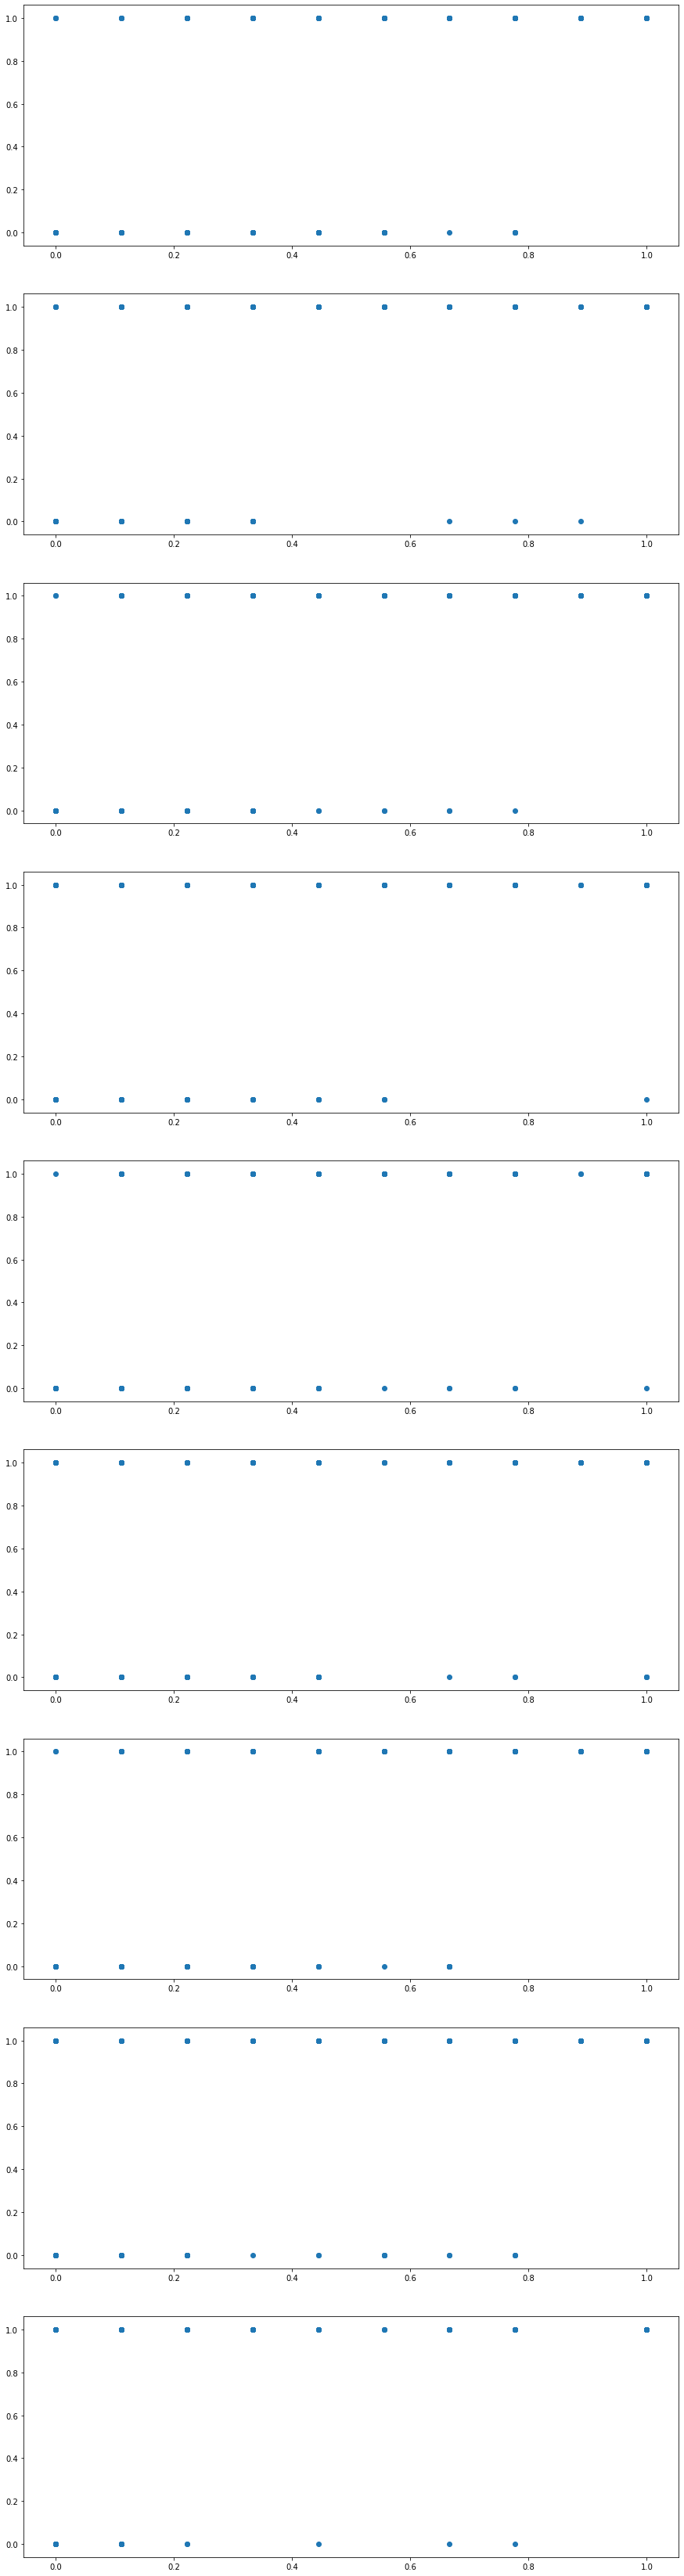

In [4]:
# useless
fig, axs = plt.subplots(len(cancer_headers)-2,1, figsize = (15,60))
for i,ax in enumerate(axs):
    ax.scatter(cancer[:,i+1],cancer[:,-1] )

Attribute:  Clump Thickness . mean :  7.188284518828452  +-  2.432801643243244 
mean :  2.963963963963964  +=  1.6707765251222568 

Attribute:  Uniformity of Cell Size . mean :  6.577405857740586  +-  2.7185385499992076 
mean :  1.3063063063063063  +=  0.854693378376896 

Attribute:  Uniformity of Cell Shape . mean :  6.560669456066946  +-  2.563723668755376 
mean :  1.4144144144144144  +=  0.9559530734879949 

Attribute:  Marginal Adhesion . mean :  5.585774058577406  +-  3.1899368652342637 
mean :  1.3468468468468469  +=  0.916054978858725 

Attribute:  Single Epithelial Cell Size . mean :  5.326359832635983  +-  2.4379701525372974 
mean :  2.108108108108108  +=  0.8761232311955693 

Attribute:  Bare Nuclei . mean :  7.627615062761507  +-  3.110151915853859 
mean :  1.3468468468468469  +=  1.17652104500383 

Attribute:  Bland Chromatin . mean :  5.97489539748954  +-  2.277642262902856 
mean :  2.0833333333333335  +=  1.061102463685029 

Attribute:  Normal Nucleoli . mean :  5.8577405

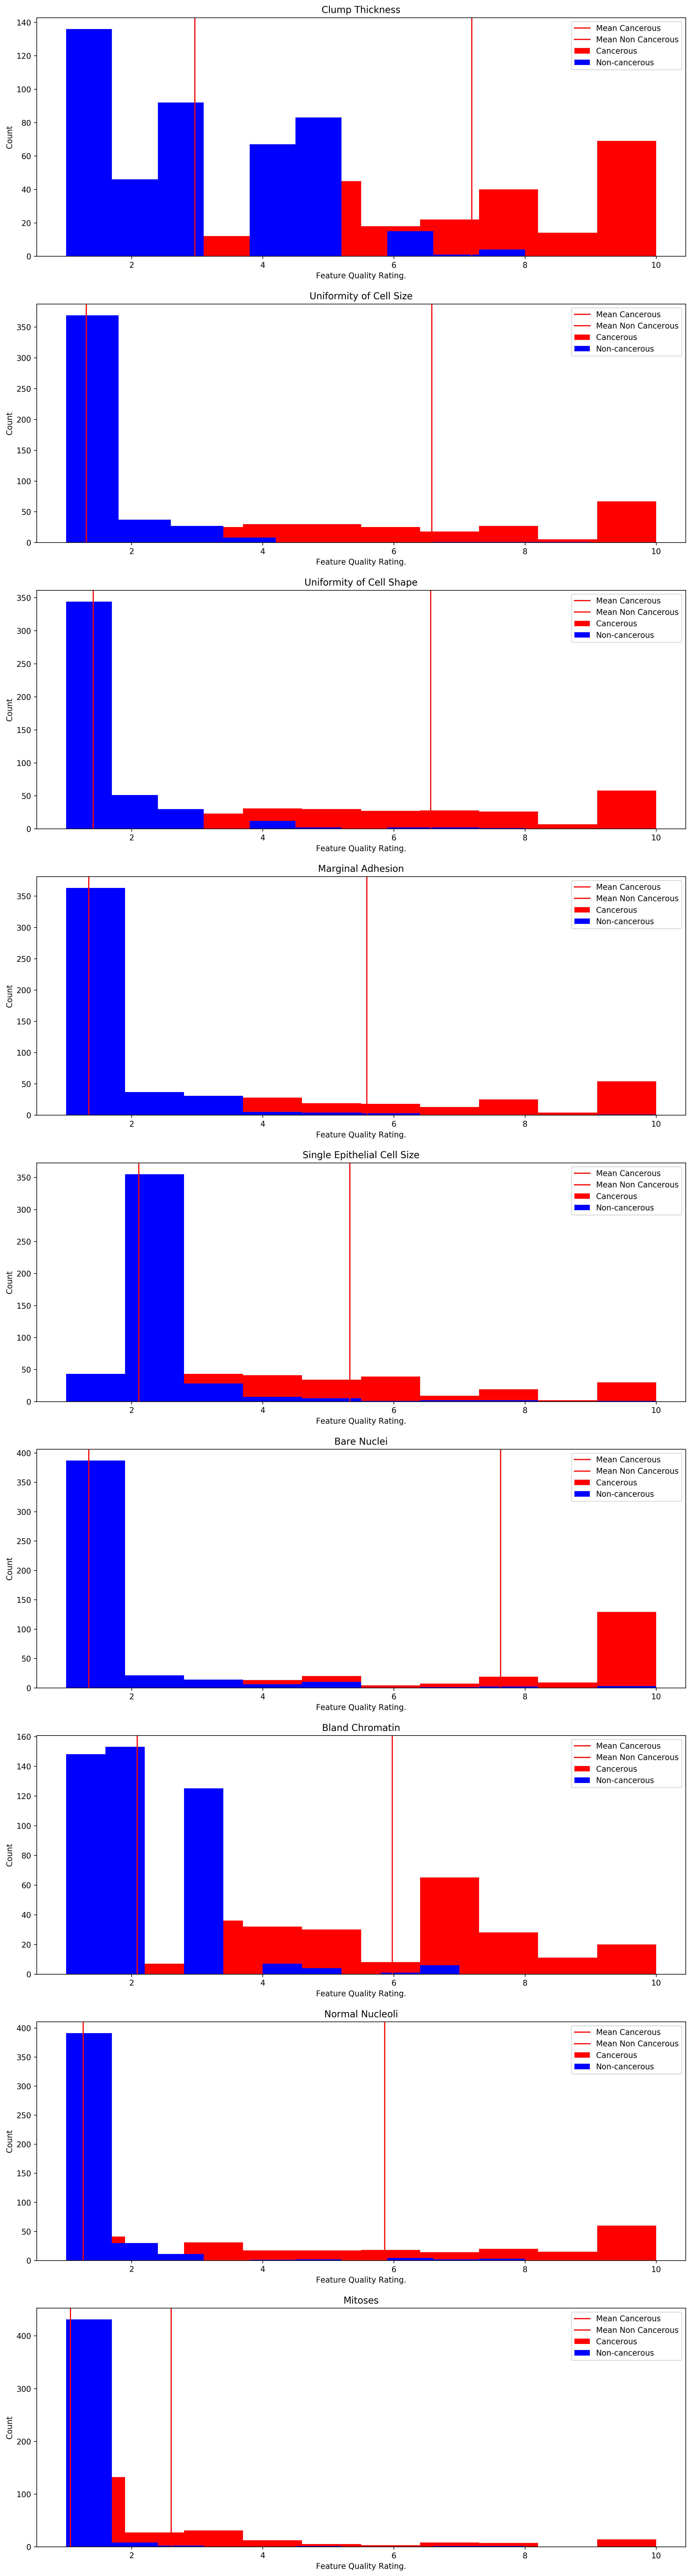

In [25]:
# plot histograms for each attribute

fig, axs = plt.subplots(len(cancer_headers)-2,1, figsize = (15,60),dpi = 250)
# print(axs.shape)
for i,attribute in enumerate(cancer_headers[1:-1]):
    
    index = i+1 #since it starts at 0 but out cancer array has 'id number' as first col
    cancerous_attribute = [x for j,x in  enumerate(cancer[:,index]) if  cancer[j,-1] == 1]
    non_cancerous_attribute = [x for j,x in  enumerate(cancer[:,index]) if  cancer[j,-1] == 0]
    
    mean_attribute_cancerous = np.mean(cancerous_attribute)
    mean_attribute_non_cancerous = np.mean(non_cancerous_attribute)

    std_attribute_cancerous = np.std(cancerous_attribute)
    std_attribute_non_cancerous = np.std(non_cancerous_attribute)


    
    axs[i].hist(cancerous_attribute,color='r', label = 'Cancerous')
    axs[i].set_title(f'{attribute}')
    axs[i].axvline(x = mean_attribute_cancerous, c ='r', label = 'Mean Cancerous')
#     axs[i].axvline(x = mean_attribute_cancerous-std_attribute_cancerous)
#     axs[i].axvline(x = mean_attribute_cancerous + std_attribute_cancerous, c = 'r')
    
    axs[i].hist(non_cancerous_attribute,color = 'b', label='Non-cancerous')
    axs[i].axvline(x = mean_attribute_non_cancerous, c ='r', label = 'Mean Non Cancerous')


#     axs[i][0].set_title(f'{attribute} non cancerous')
    axs[i].set(xlabel='Feature Quality Rating.',ylabel='Count')
    
    axs[i].legend()
    
    mean_attribute_cancerous = np.mean(cancerous_attribute)
    mean_attribute_non_cancerous = np.mean(non_cancerous_attribute)

    std_attribute_cancerous = np.std(cancerous_attribute)
    std_attribute_non_cancerous = np.std(non_cancerous_attribute)
    
    extent = axs[i].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    
    fig.savefig(f'./plots/preprocess wine/{i}.png', bbox_inches=extent.expanded(1.1, 1.2))
#     axs[i].figure.savefig(f'./plots/preprocess wine/{i}.png',bbox_inches="tight")
    
    print('Attribute: ',attribute,'. mean : ',mean_attribute_cancerous,' +- ',std_attribute_cancerous, '\nmean : ',mean_attribute_non_cancerous,' += ',std_attribute_non_cancerous,'\n')
plt.show()

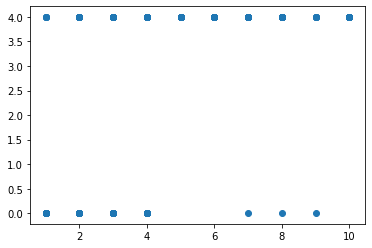

In [57]:
plt.scatter(cancer[:,2],cancer[:,-1])

In [66]:
[x for i,x in  enumerate(cancer[:,1]) if  cancercancer_good[i,-1] == 1]

[]

In [110]:
for i,attribute in enumerate(cancer_headers[1:-1]):
    index = i+1
    print(index,' ',attribute)

1   Clump Thickness
2   Uniformity of Cell Size
3   Uniformity of Cell Shape
4   Marginal Adhesion
5   Single Epithelial Cell Size
6   Single Epithelial Cell Size
7   Bare Nuclei
8   Bland Chromatin
9   Normal Nucleoli
10   Mitoses


In [117]:
len(cancer_headers)

12

In [20]:
# find correlation coefficients

corrcoefficients = np.corrcoef(wine_data[:,:-1],rowvar = False)

In [21]:
print(corrcoefficients.shape)

(11, 11)


In [98]:
[print(i) for i in corrcoefficients]
print(wine_headers[7])

[ 1.         -0.25613089  0.67170343  0.11477672  0.09370519 -0.15379419
 -0.11318144  0.66804729 -0.68297819  0.18300566 -0.06166827]
[-0.25613089  1.         -0.55249568  0.00191788  0.06129777 -0.01050383
  0.07647     0.02202623  0.23493729 -0.26098669 -0.20228803]
[ 0.67170343 -0.55249568  1.          0.14357716  0.20382291 -0.06097813
  0.03553302  0.36494718 -0.54190414  0.31277004  0.10990325]
[ 0.11477672  0.00191788  0.14357716  1.          0.05560954  0.187049
  0.20302788  0.35528337 -0.08565242  0.00552712  0.04207544]
[ 0.09370519  0.06129777  0.20382291  0.05560954  1.          0.00556215
  0.04740047  0.20063233 -0.26502613  0.37126048 -0.22114054]
[-0.15379419 -0.01050383 -0.06097813  0.187049    0.00556215  1.
  0.66766645 -0.02194583  0.0703775   0.05165757 -0.06940835]
[-0.11318144  0.07647     0.03553302  0.20302788  0.04740047  0.66766645
  1.          0.07126948 -0.06649456  0.04294684 -0.20565394]
[ 0.66804729  0.02202623  0.36494718  0.35528337  0.20063233 -0.0

In [99]:
d= {}
for i in range(len(corrcoefficients)):
    for j in range(len(corrcoefficients)- i):
        if  np.abs(corrcoefficients[i][j+i]) > 0.6:
            if i in d:
                print(i,' : ',j+i)
                d[i].append({wine_headers[j+i]:corrcoefficients[i][j+i]})
            else:
                d[i] = []

0  :  2
0  :  7
0  :  8
5  :  6


In [101]:
print(wine_headers)
d

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


{0: [{'citric acid': 0.6717034347641061},
  {'density': 0.6680472921189732},
  {'pH': -0.6829781945685314}],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [{'total sulfur dioxide': 0.6676664504810214}],
 6: [],
 7: [],
 8: [],
 9: [],
 10: []}

In [80]:
headers_to_rem = []
s = set(wine_headers)

for key, value in d.items():
    for i in value:
        headers_to_rem.append(i)
headers_to_rem = set(headers_to_rem)

In [83]:
# get the indeces in of each param in our wine_headers
indeces_to_keep = []
for item in s.difference(headers_to_rem):
    indeces_to_keep.append(wine_headers.index(item))


In [84]:
sorted(indeces_to_keep)


[0, 1, 3, 4, 5, 9, 10, 11]

In [62]:
wine_uncorrelated_data = np.take(wine_data, indeces_to_keep,axis = 1)

In [63]:
wine_uncorrelated_data.shape

(1599, 8)

In [75]:
np.inf < 10

False

In [85]:
headers_to_rem

{'citric acid', 'density', 'pH', 'total sulfur dioxide'}

In [90]:
wine_headers

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [119]:
weights = np.asarray([[10,11],[-100,-29],[0,-19]])

def sign(weights):
    weights = np.copy(weights)
    weights[weights<0] = -1
    weights[weights>0]=1
    return weights

In [143]:
np.random.shuffle(wine_data).shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [137]:
weights = np.asarray([[10,11],[-100,-29],[0,-19]])

In [138]:
def add_features(data):
        """ 
        squares all the features
        """
        data = np.copy(data)
        to_ret = np.zeros((data.shape[0], data.shape[1]*2))
        to_ret[:,:] = 
        for col in data:
            to_append.append(col**2)
            
        return np.append(data,to_append)

In [165]:
weights = np.asarray([[10,11,1],[-100,-29,0],[0,-19,1]])

weights

array([[  10,   11,    1],
       [-100,  -29,    0],
       [   0,  -19,    1]])

In [157]:
aug = np.zeros((weights.shape[0], weights.shape[1]*2-1))

In [158]:
aug

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [153]:
weights[:,:]**2

array([[  100,   121],
       [10000,   841],
       [    0,   361]])

In [161]:
aug[:,:weights.shape[1]-1] = weights[:,:-1]
aug[:,weights.shape[1]-1:-1] = weights[:,:-1]**2

In [169]:
def add_features(data):
        """
        squares all the features
        """
        data = np.copy(data)

        shape0 = data.shape[0]
        shape1 = data.shape[1]

        data_augmented = np.zeros((shape0, shape1*2-1))

        #add the current data to the first half and the squared data to the second half
        data_augmented[:, :shape1-1] = data[:,:-1]
        data_augmented[:,shape1-1:-1] = data[:,:-1]**2
        data_augmented[:,-1] = data[:,-1]

        return data_augmented

In [170]:
add_features(weights)

array([[ 1.00e+01,  1.10e+01,  1.00e+02,  1.21e+02,  1.00e+00],
       [-1.00e+02, -2.90e+01,  1.00e+04,  8.41e+02,  0.00e+00],
       [ 0.00e+00, -1.90e+01,  0.00e+00,  3.61e+02,  1.00e+00]])

In [178]:
import matplotlib
# matplotlib.use('agg')


import matplotlib.pyplot as plt
splits = [2,3,4,5,6]
acc = [1,2,3,4,5]

fig = plt.figure(figsize = (15,12))
plt.plot(splits,acc)
plt.xlabel('hello')

Text(0.5, 0, 'hello')

In [182]:
i = [i for i in range(100)]

AttributeError: 'list' object has no attribute 'shape'

In [6]:
if 0:
    print('h')